# Example 4.2: Jack’s Car Rental problem

Original Source: https://github.com/zyxue/sutton-barto-rl-exercises/blob/master/reinforcement/chapter04-dynamic-programming/gambler.ipynb

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 9)

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

from rl import Environment, DPAgent
from gambler import GamblerEnv

Comparing value function for different probability of head

* Depending on the value of probability, the value function can be concave (left), straight line (middle) or convex (right)
* Value function is insensitive to how ties are broken when calculating argmax over all allowed actions, which is also why there are many optimal policies for the same value function

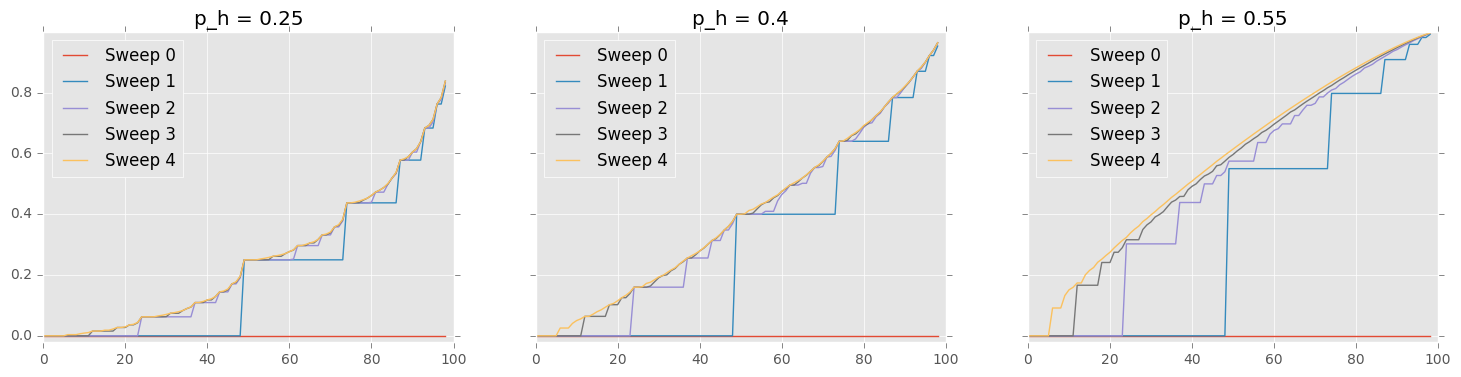

In [2]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharex=True, sharey=True)
axes = axes.ravel()
for ax, p in zip(axes, [0.25, 0.4, 0.55]):
    env = GamblerEnv(max_capital=100, prob_head=p)
    agent = DPAgent(env, gamma=1)

    for k in range(5):
        agent.value_iteration(counter_cutoff=1)
        ax.plot(agent.V[1:-2], label='Sweep {0}'.format(k))
    ax.set_title('p_h = {0}'.format(p))
    ax.legend(loc='best')
    ax.set_ylim([-0.02, 1])

Break tie in a non-greedy way (the way it's implemented), meaning bet as small as possible. This results in a plot similar to that show on the text book

not converged, stopped after 300 sweeps
not converged, stopped after 300 sweeps
not converged, stopped after 300 sweeps


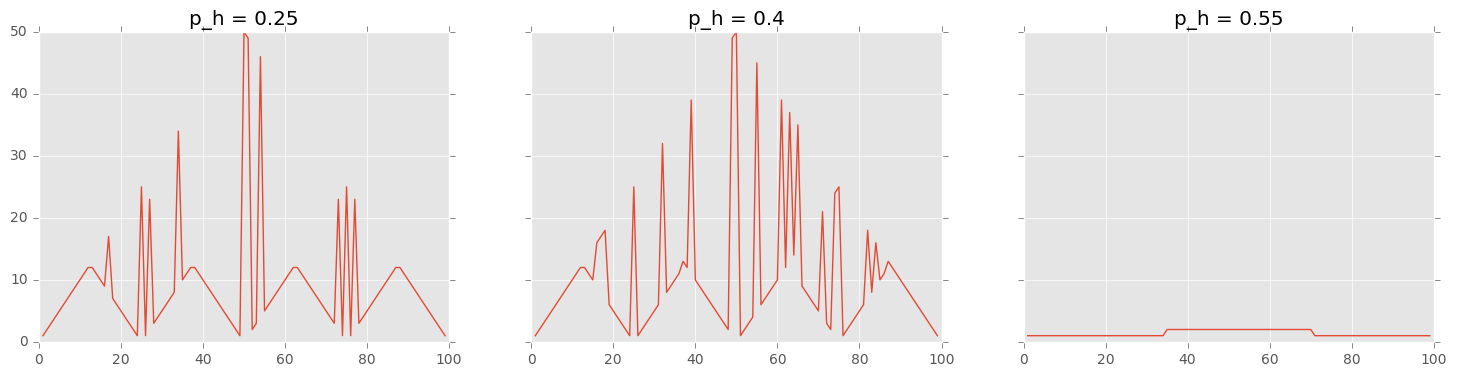

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharex=True, sharey=True)
axes = axes.ravel()
for ax, p in zip(axes, [0.25, 0.4, 0.55]):
    env = GamblerEnv(max_capital=100, prob_head=p)
    agent = DPAgent(env, gamma=1)

    # When delta is close 0, it's numerically unstable
    agent.value_iteration(delta_cutoff=-1, counter_cutoff=300, verbose=True)
    ax.set_title('p_h = {0}'.format(p))
    ax.plot(agent.env.states[1:-2],
            [agent.env.get_action(_) for _ in agent.pi[1:-2]])

Break tie in a greedy way (with change in `value_iteration` in source code), which means bet as most as possible

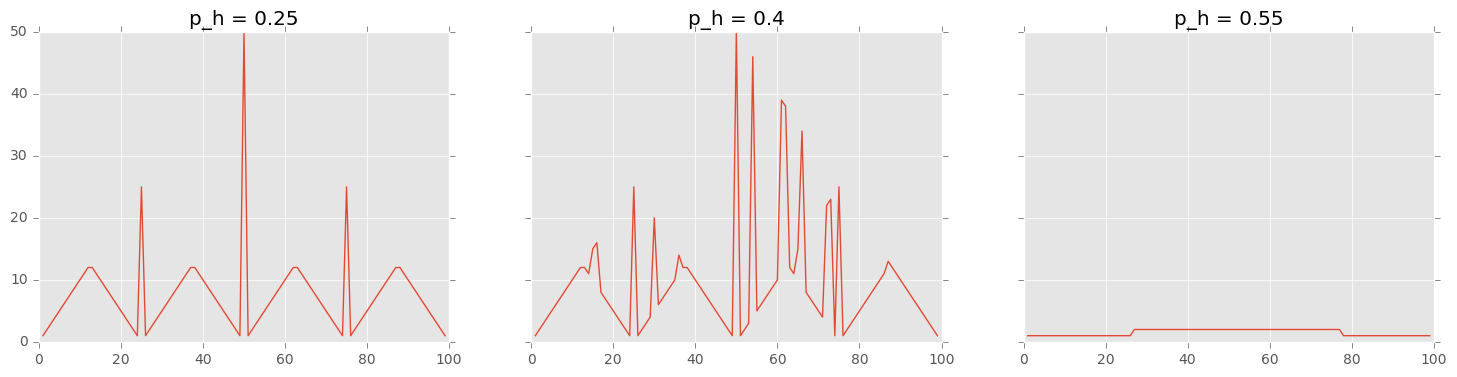

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharex=True, sharey=True)
axes = axes.ravel()
for ax, p in zip(axes, [0.25, 0.4, 0.55]):
    env = GamblerEnv(max_capital=100, prob_head=p)
    agent = DPAgent(env, gamma=1)

    agent.value_iteration()
    ax.set_title('p_h = {0}'.format(p))
    ax.plot(agent.env.states[1:-2],
            [agent.env.get_action(_) for _ in agent.pi[1:-2]])

Randomly breaking ties (with change in `value_iteration` in source code) for a number of experiments, collect all their policies.

In [5]:
env = GamblerEnv(max_capital=100, prob_head=0.4)
agent = DPAgent(env, gamma=1)

pis = []
for k in range(200):
    agent.reset()
    deltas = agent.value_iteration()
    pis.append(agent.pi)
    if (k + 1) % 50 == 0:
        print('done {0} training'.format(k + 1))

done 50 training
done 100 training
done 150 training
done 200 training


If take the minimum stake action in each state and plot. The result is similar to that in the textbook. Otherwise the shape is close to a large triagle.

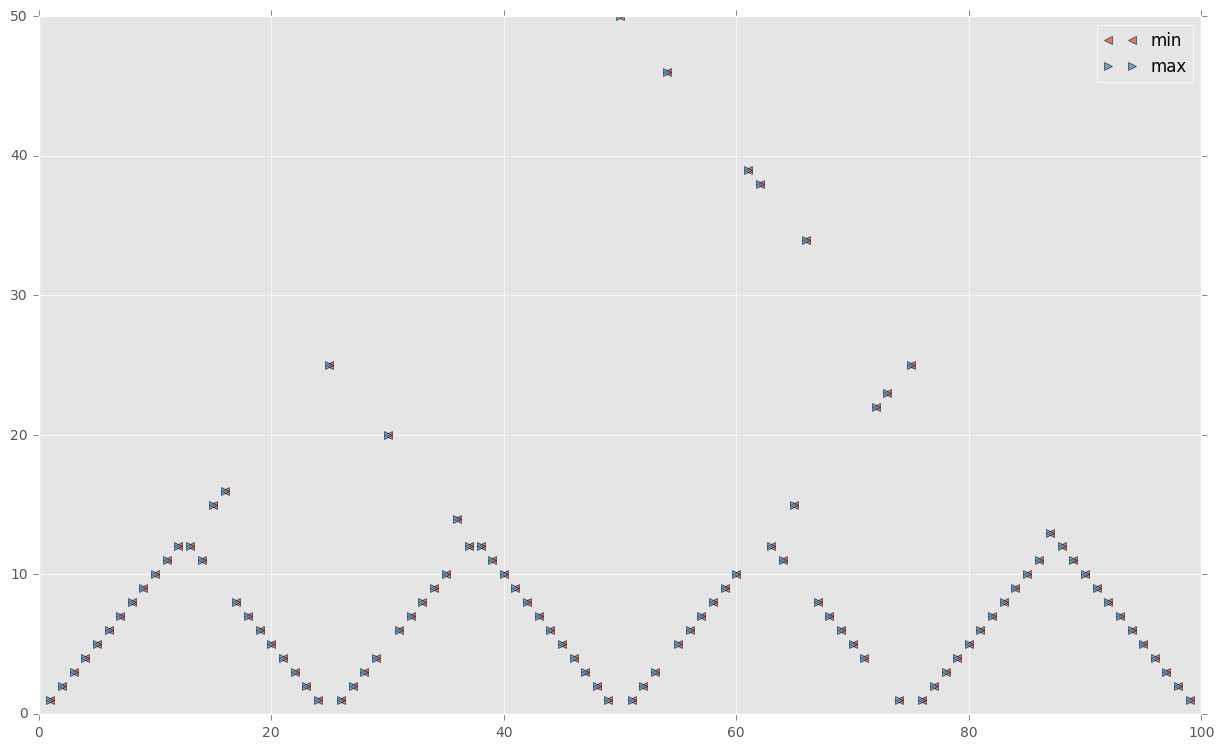

In [6]:
for k, pi in enumerate([
    np.array(pis).min(axis=0).astype(int),
    np.array(pis).max(axis=0).astype(int)
]):
    label = 'min' if k == 0 else 'max'
    marker = '<'  if k == 0 else '>'
    plt.plot(agent.env.states[1:-2], 
             [agent.env.get_action(_) for _ in pi[1:-2]], 
             marker, alpha=0.7, label=label)
plt.legend()

Change to the environment with a negative reward of -0.1 per gamble (with change to source code in `GamblerEnv`). It's interesting to see that all policies in each case of $p_h$ turns out to be gamble as much as possible so that the game can end as quickly as possible.

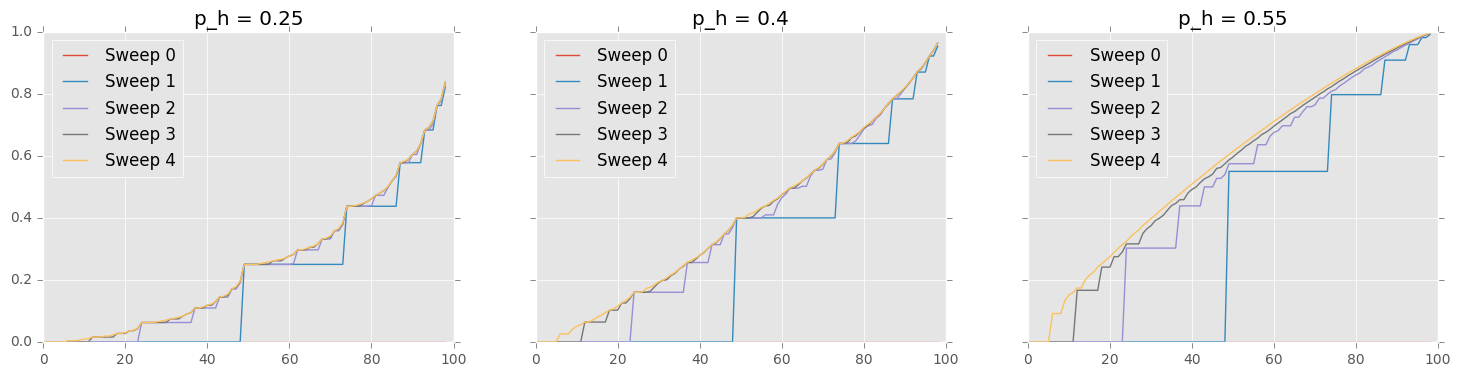

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharex=True, sharey=True)
axes = axes.ravel()
for ax, p in zip(axes, [0.25, 0.4, 0.55]):
    env = GamblerEnv(max_capital=100, prob_head=p)
    agent = DPAgent(env, gamma=1)

    for k in range(5):
        agent.value_iteration(counter_cutoff=1)
        ax.plot(agent.V[1:-2], label='Sweep {0}'.format(k))
    ax.set_title('p_h = {0}'.format(p))
    ax.legend(loc='best')
#     ax.set_ylim([-0.02, 1])

not converged, stopped after 300 sweeps
not converged, stopped after 300 sweeps
not converged, stopped after 300 sweeps


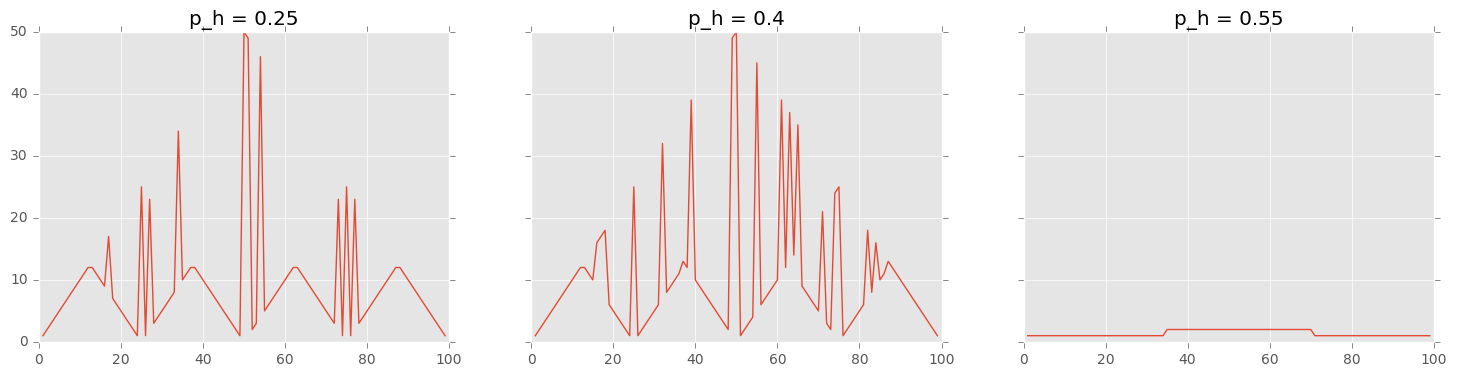

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharex=True, sharey=True)
axes = axes.ravel()
for ax, p in zip(axes, [0.25, 0.4, 0.55]):
    env = GamblerEnv(max_capital=100, prob_head=p)
    agent = DPAgent(env, gamma=1)

    # When delta is close 0, it's numerically unstable
    agent.value_iteration(delta_cutoff=-1, counter_cutoff=300, verbose=True)
    ax.set_title('p_h = {0}'.format(p))
    ax.plot(agent.env.states[1:-2],
            [agent.env.get_action(_) for _ in agent.pi[1:-2]])